# Comparison of Streaming Platforms for TV-shows

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

%matplotlib inline

In [2]:
video_data = pd.read_csv('tv_shows_data.csv')

In [3]:
display(video_data.head())

,Unnamed: 0,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,type
0,0,Breaking Bad,2008,18+,9.5,96%,1,0,0,0,1
1,1,Stranger Things,2016,16+,8.8,93%,1,0,0,0,1
2,2,Money Heist,2017,18+,8.4,91%,1,0,0,0,1
3,3,Sherlock,2010,16+,9.1,78%,1,0,0,0,1
4,4,Better Call Saul,2015,18+,8.7,97%,1,0,0,0,1


In [4]:
#Remove unecessary columns
video_data = video_data.drop(['Unnamed: 0', 'type'], axis=1)

In [5]:
display(video_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5611 entries, 0 to 5610
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Title            5611 non-null   object 
 1   Year             5611 non-null   int64  
 2   Age              3165 non-null   object 
 3   IMDb             4450 non-null   float64
 4   Rotten Tomatoes  1011 non-null   object 
 5   Netflix          5611 non-null   int64  
 6   Hulu             5611 non-null   int64  
 7   Prime Video      5611 non-null   int64  
 8   Disney+          5611 non-null   int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 394.6+ KB


None

In [6]:
#Testing for duplicated TV show Titles
duplicates = video_data.duplicated(subset='Title', keep=False)
duplicated_values = video_data[duplicates].sort_values('Title')
display(duplicated_values.head(20))

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+
3119,Abandoned,2012,NaN,NaN,NaN,0,1,0,0
2804,Abandoned,2016,16+,8.4,NaN,0,1,0,0
2580,American Gladiators,1989,7+,6.5,NaN,0,1,0,0
3044,American Gladiators,2008,NaN,5.6,NaN,0,1,0,0
3776,American Gothic,2016,16+,6.7,58%,0,0,1,0
2271,American Gothic,1995,7+,8.1,67%,0,1,0,0
2226,Baby Daddy,2012,16+,7.3,NaN,0,1,0,0
1370,Baby Daddy,2015,16+,6.0,78%,1,0,0,0
4397,Baby Talk,1991,all,4.2,NaN,0,0,1,0
5235,Baby Talk,2017,NaN,NaN,NaN,0,0,1,0


In [7]:
#Duplicates are likely to be different shows sharing the same title, due to mostly different attributes (no identical year)

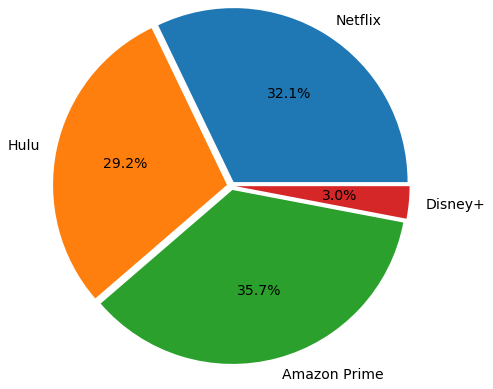

In [8]:
#Pie Chart for total tv-show distribution

netflix_sum = video_data['Netflix'].sum()
hulu_sum = video_data['Hulu'].sum()
prime_sum = video_data['Prime Video'].sum()
disney_sum = video_data['Disney+'].sum()

market_shares = [netflix_sum, hulu_sum, prime_sum, disney_sum]
labels = ('Netflix', 'Hulu', 'Amazon Prime', 'Disney+')
sep = (0.05, 0.05, 0.05, 0.05)

fig, ax = plt.subplots()

ax.pie(market_shares,
      explode=sep,
      labels = labels,
      autopct = '%.1f%%',
      radius=2,
     textprops={'fontsize': 14})

plt.show()

In [9]:
#Dataframes for each platform
netflix_shows = video_data.loc[video_data['Netflix'] == 1].drop(['Hulu', 'Prime Video', 'Disney+'], axis=1)
hulu_shows = video_data.loc[video_data['Hulu'] == 1].drop(['Netflix', 'Prime Video', 'Disney+'], axis=1)
prime_shows = video_data.loc[video_data['Prime Video'] == 1].drop(['Hulu', 'Netflix', 'Disney+'], axis=1)
disney_shows = video_data.loc[video_data['Disney+'] == 1].drop(['Hulu', 'Prime Video', 'Netflix'], axis=1)


In [10]:
#Who is the platform with the most highly rated shows?
top_netflix_shows = netflix_shows['IMDb'] > 8
top_hulu_shows = hulu_shows['IMDb'] > 8 
top_prime_shows = prime_shows['IMDb'] > 8
top_disney_shows = disney_shows['IMDb'] > 8

top_rated_shows = pd.DataFrame({
    'platforms' : ['Netflix', 
                   'Hulu', 
                   'Prime Video', 
                   'Disney'],
    'total_mov' : [top_netflix_shows.sum(),
                   top_hulu_shows.sum(),
                   top_prime_shows.sum(),
                   top_disney_shows.sum()]})

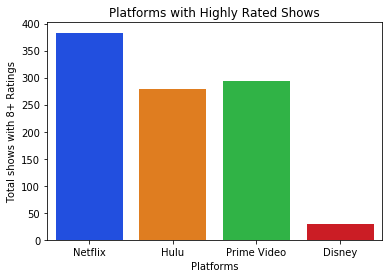

In [11]:
sns.barplot(x = top_rated_shows['platforms'],
            y = top_rated_shows['total_mov'],
            data = top_rated_shows,
           palette = 'bright')

plt.xlabel('Platforms')
plt.ylabel('Total shows with 8+ Ratings')
plt.title('Platforms with Highly Rated Shows')
plt.show()

In [12]:
#Who is the platform with the best concentration of highly rated shows? 

ratio_netflix = (top_netflix_shows.sum() / netflix_sum * 100)
ratio_hulu = (top_hulu_shows.sum() / hulu_sum * 100)
ratio_prime = (top_prime_shows.sum() / prime_sum * 100)
ratio_disney = (top_disney_shows.sum() / disney_sum * 100)

print('Netflix provides on average ' + str(int(round(ratio_netflix))) + ' high quality tv-shows out of every 100 tv-shoows')
print('Hulu provides on average ' + str(int(round(ratio_hulu))) + ' high quality tv-shows out of every 100 tv-shoows')
print('Prime Video provides on average ' + str(int(round(ratio_prime))) + ' high quality tv-shows out of every 100 tv-shoows')
print('Disney+ provides on average ' + str(int(round(ratio_disney))) + ' high quality tv-shows out of every 100 tv-shoows')


Netflix provides on average 20 high quality tv-shows out of every 100 tv-shoows
Hulu provides on average 16 high quality tv-shows out of every 100 tv-shoows
Prime Video provides on average 14 high quality tv-shows out of every 100 tv-shoows
Disney+ provides on average 17 high quality tv-shows out of every 100 tv-shoows


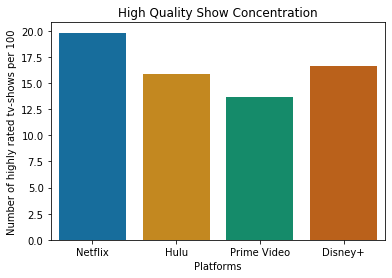

In [13]:
top_rated_ratios = ({
    'platforms' : ['Netflix',
                   'Hulu',
                   'Prime Video',
                  'Disney+'],
    'ratios' : [ratio_netflix,
               ratio_hulu,
               ratio_prime,
               ratio_disney]
})

sns.barplot(x = top_rated_ratios['platforms'],
           y = top_rated_ratios['ratios'],
           palette = 'colorblind')

plt.xlabel('Platforms')
plt.ylabel('Number of highly rated tv-shows per 100')
plt.title('High Quality Show Concentration')

plt.show()

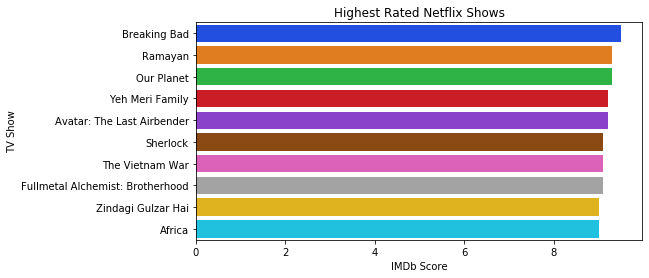

In [14]:
#Best tv-shows on offer for each streaming platform according to IMDb

netflix_top_10 = netflix_shows.sort_values(by='IMDb', ascending = False).head(10)

plt.figure(figsize=(8,4))
sns.barplot(x='IMDb', y='Title', data=netflix_top_10, palette='bright')

plt.xlabel('IMDb Score')
plt.ylabel('TV Show')
plt.title('Highest Rated Netflix Shows')

plt.show()

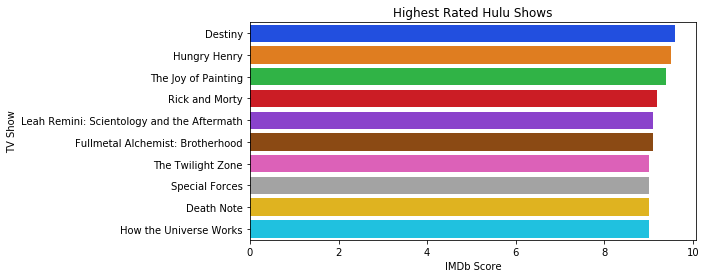

In [15]:
hulu_top_10 = hulu_shows.sort_values(by='IMDb', ascending = False).head(10)

plt.figure(figsize=(8,4))
sns.barplot(x='IMDb', y='Title', data=hulu_top_10, palette='bright')

plt.xlabel('IMDb Score')
plt.ylabel('TV Show')
plt.title('Highest Rated Hulu Shows')

plt.show()

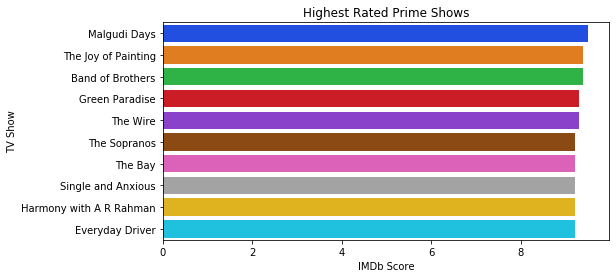

In [16]:
prime_top_10 = prime_shows.sort_values(by='IMDb', ascending = False).head(10)

plt.figure(figsize=(8,4))
sns.barplot(x='IMDb', y='Title', data=prime_top_10, palette='bright')

plt.xlabel('IMDb Score')
plt.ylabel('TV Show')
plt.title('Highest Rated Prime Shows')

plt.show()

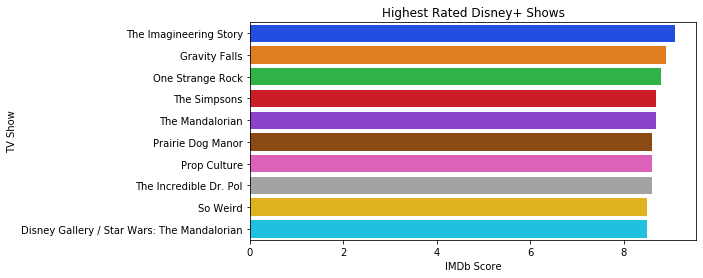

In [17]:
disney_top_10 = disney_shows.sort_values(by='IMDb', ascending = False).head(10)

plt.figure(figsize=(8,4))
sns.barplot(x='IMDb', y='Title', data=disney_top_10, palette='bright')

plt.xlabel('IMDb Score')
plt.ylabel('TV Show')
plt.title('Highest Rated Disney+ Shows')

plt.show()

<Figure size 360x360 with 0 Axes>

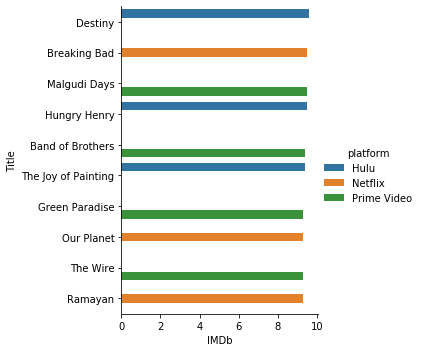

In [18]:
#Who has access to the top 10 tv-shows currently?

video_data['platform'] = video_data[['Netflix', 'Hulu', 'Prime Video', 'Disney+']].idxmax(axis=1)

overall_top_10 = video_data.sort_values(by='IMDb', ascending=False).head(10)

plt.figure(figsize=(5,5))
sns.catplot(x='IMDb', y='Title', data=overall_top_10,hue='platform', kind='bar')
plt.show()